In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import pandas as pd

In [5]:
# URL of the page to scrape
url = 'https://www.census.gov/foreign-trade/balance/c5700.html'

# Send a GET request to fetch the page content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Initialize lists to store data
data = []

# Locate all anchor tags that might indicate a new year section
year_sections = soup.find_all('a', {"name": True})

for anchor in year_sections:
    # Extract the year and validate it
    year = anchor['name']
    if year.isdigit() and len(year) == 4:
        # Locate the table following the anchor
        table = anchor.find_next('table')
        if table:
            # Loop through rows within the table
            for row in table.find_all('tr')[1:]:  # Skip header row
                cols = row.find_all('td')

                if len(cols) == 4:
                    # Extract month and clean up data, skipping 'TOTAL' rows
                    month = cols[0].get_text(strip=True).split()[0]
                    if month == 'TOTAL':  # Skip totals row
                        continue
                    exports = cols[1].get_text(strip=True).replace(',', '')
                    imports = cols[2].get_text(strip=True).replace(',', '')
                    balance = cols[3].get_text(strip=True).replace(',', '')

                    # Append data as a dictionary
                    data.append({
                        'Year': int(year),
                        'Month': month,
                        'Exports': float(exports) if exports else None,
                        'Imports': float(imports) if imports else None,
                        'Balance': float(balance) if balance else None
                    })

# Convert to DataFrame
df = pd.DataFrame(data)
print(df.shape)
df.head()

(478, 5)


,Year,Month,Exports,Imports,Balance
0,2024,January,12073.1,35793.6,-23720.5
1,2024,February,12010.9,31894.8,-19883.9
2,2024,March,12771.7,29940.6,-17168.9
3,2024,April,11520.7,31630.4,-20109.7
4,2024,May,11061.4,35037.0,-23975.6


In [4]:
# Create an SQLite database and save the DataFrame to a table
engine = create_engine('sqlite:///trade_data.db')
df.to_sql('us_china_trade', engine, if_exists='replace', index=False)

# Verify the data
with engine.connect() as conn:
    df_sample = pd.read_sql("SELECT * FROM us_china_trade LIMIT 60", conn)
    display(df_sample)

,Year,Month,Exports,Imports,Balance
0,2024,January,12073.1,35793.6,-23720.5
1,2024,February,12010.9,31894.8,-19883.9
2,2024,March,12771.7,29940.6,-17168.9
3,2024,April,11520.7,31630.4,-20109.7
4,2024,May,11061.4,35037.0,-23975.6
5,2024,June,11319.0,34114.0,-22795.0
6,2024,July,10712.9,40836.6,-30123.6
7,2024,August,11974.7,39851.2,-27876.5
8,2024,September,11263.2,43074.2,-31810.9
9,2024,October,13501.9,41464.1,-27962.2


In [8]:
# Connect to the SQLite database
conn = sqlite3.connect('trade_data.db')
query = "SELECT Year, Month, Balance FROM us_china_trade WHERE Year >= 2000"
trade_data = pd.read_sql(query, conn)

# Close the database connection
conn.close()

In [10]:
# Process data for plotting
trade_data['Date'] = pd.to_datetime(trade_data['Year'].astype(str) + '-' + trade_data['Month'])
trade_data = trade_data.sort_values(by='Date')

# Convert balance to billions for better readability
trade_data['Balance (Billions USD)'] = trade_data['Balance'] / 1e9
trade_data

/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_2908/2992594837.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trade_data['Date'] = pd.to_datetime(trade_data['Year'].astype(str) + '-' + trade_data['Month'])


,Year,Month,Balance,Date,Balance (Billions USD)
286,2000,January,-6039.0,2000-01-01,-0.000006
287,2000,February,-5611.7,2000-02-01,-0.000006
288,2000,March,-5093.6,2000-03-01,-0.000005
289,2000,April,-5843.0,2000-04-01,-0.000006
290,2000,May,-6323.9,2000-05-01,-0.000006
...,...,...,...,...,...
5,2024,June,-22795.0,2024-06-01,-0.000023
6,2024,July,-30123.6,2024-07-01,-0.000030
7,2024,August,-27876.5,2024-08-01,-0.000028
8,2024,September,-31810.9,2024-09-01,-0.000032


In [11]:
# Save the dataset
trade_data.to_csv("trade_data.csv", index = False)
print("Trade data saved successfully to trade_data.csv")

Trade data saved successfully to trade_data.csv


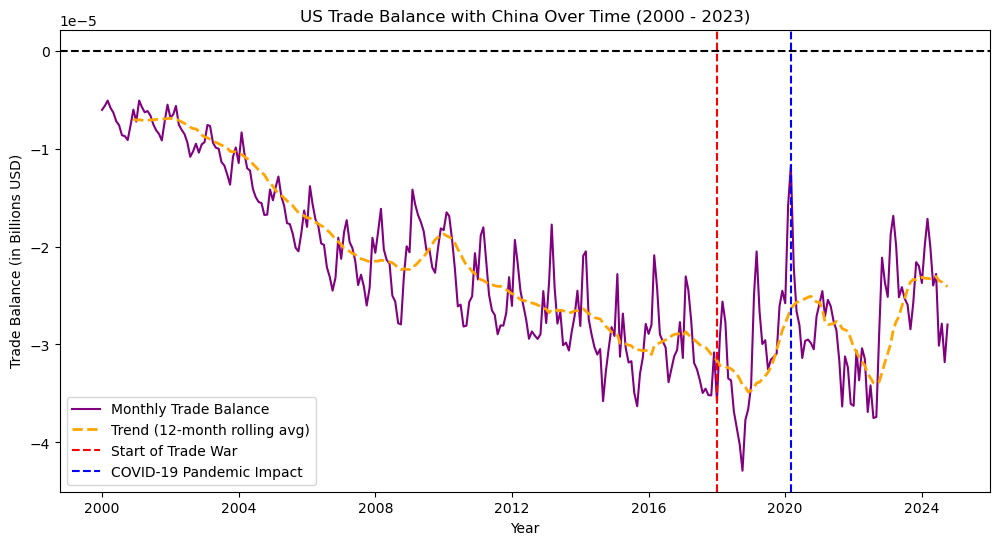

In [12]:
# Plot Trade Balance Over Time with Enhancements
plt.figure(figsize=(12, 6))
plt.plot(trade_data['Date'], trade_data['Balance (Billions USD)'], color='purple', label='Monthly Trade Balance')

# Add a trend line using a rolling average to smooth out short-term fluctuations
trade_data['Balance Trend'] = trade_data['Balance (Billions USD)'].rolling(window=12).mean()
plt.plot(trade_data['Date'], trade_data['Balance Trend'], color='orange', linestyle='--', linewidth=2, label='Trend (12-month rolling avg)')

# Highlight specific economic events for context
plt.axvline(pd.to_datetime('2018-01-01'), color='red', linestyle='--', label='Start of Trade War')
plt.axvline(pd.to_datetime('2020-03-01'), color='blue', linestyle='--', label='COVID-19 Pandemic Impact')

# Adjust plot details
plt.xlabel('Year')
plt.ylabel('Trade Balance (in Billions USD)')
plt.title('US Trade Balance with China Over Time (2000 - 2023)')
plt.axhline(0, color='black', linestyle='--')  # Zero line for balance
plt.legend()

# Save the plot
plt.savefig("trade_balance.png", dpi=300)  # Save plot as PNG

# Show the plot
plt.show()

In [14]:
# Extract month from the Date for seasonal analysis
trade_data['Month'] = trade_data['Date'].dt.month
monthly_avg = trade_data.groupby('Month')['Balance (Billions USD)'].mean()

# Save the dataset
trade_data.to_csv("trade_data.csv", index = False)
print("Trade data saved successfully to trade_data.csv")

Trade data saved successfully to trade_data.csv


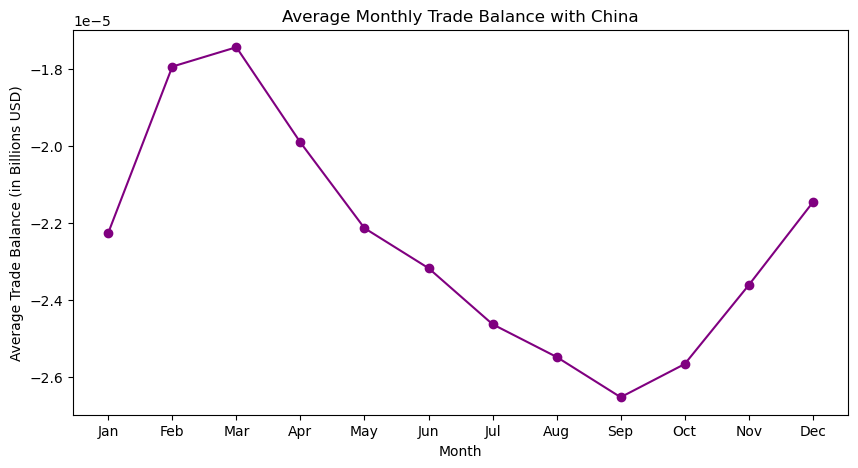

In [16]:
# Plot Seasonal Trend
plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='line', marker='o', color='purple')
plt.xlabel('Month')
plt.ylabel('Average Trade Balance (in Billions USD)')
plt.title('Average Monthly Trade Balance with China')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.savefig("monthly_trade.png", dpi=300)  # Save plot as PNG
plt.show()